In [27]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("C:\\Users\\user\\AppData\\Local\\Temp\\e8d5b909-987e-4df4-8c6d-f9f6a735116b_MLR.zip.16b\\MLR\\ToyotaCorolla - MLR.csv")
# Verify column names
print("Columns in the dataset:", df.columns)


Columns in the dataset: Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [28]:
# EDA - Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min  

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


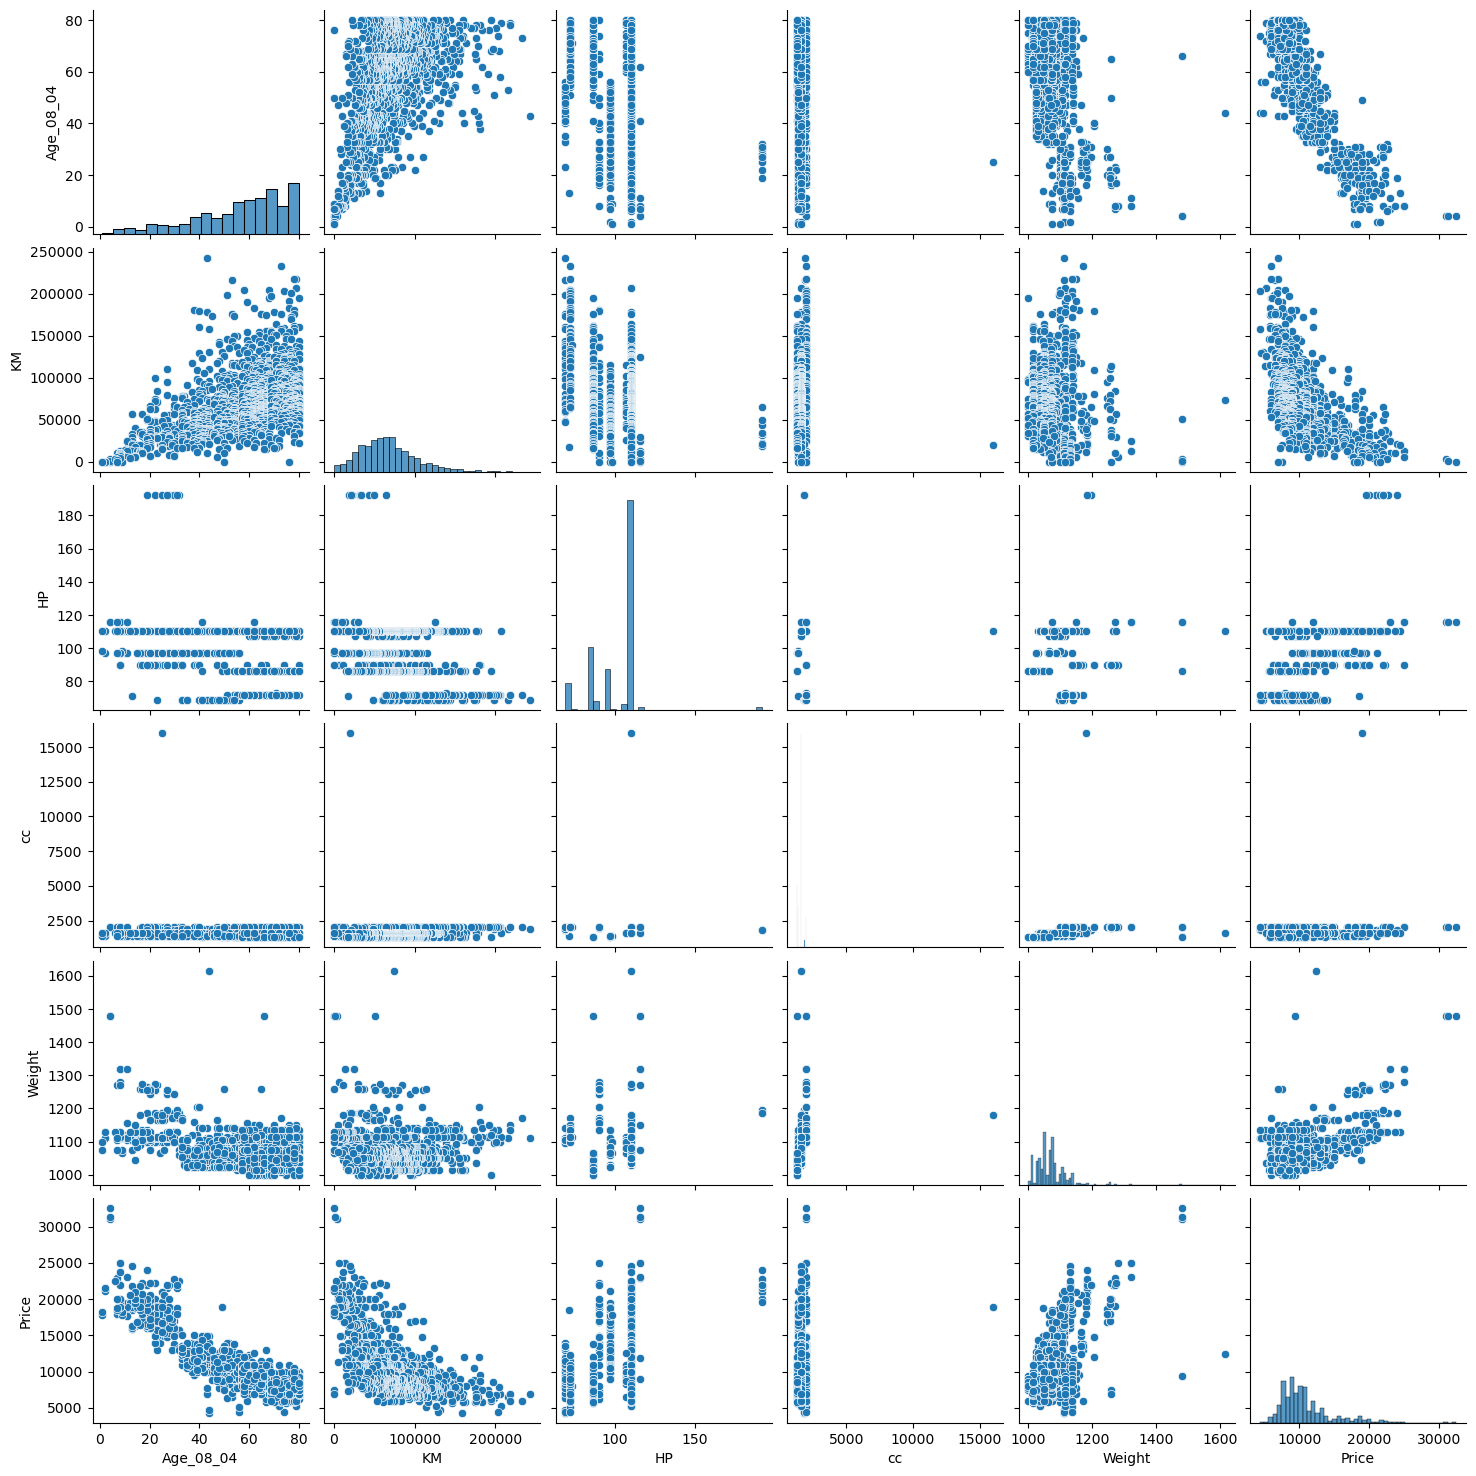

In [29]:
# EDA - Pairplot
sns.pairplot(df[['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price']])
plt.show()

In [30]:
# EDA - Boxplot for categorical variables
# Convert 'Automatic' to integer if not already
df['Automatic'] = df['Automatic'].astype(int)

In [31]:
# Encoding categorical variable 'Fuel_Type'
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)


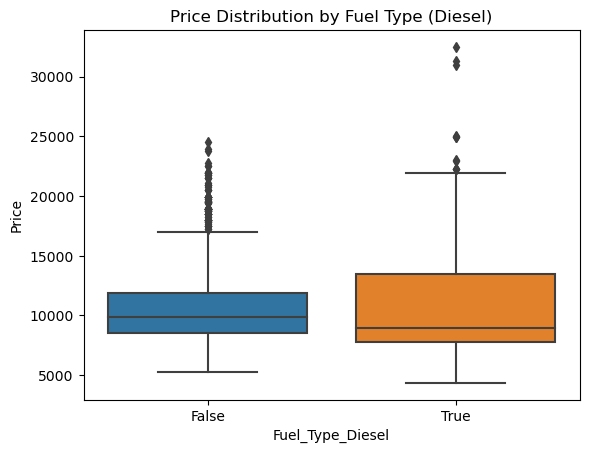

In [32]:
# Boxplot for Fuel_Type
if 'Fuel_Type_Diesel' in df.columns:
    sns.boxplot(x='Fuel_Type_Diesel', y='Price', data=df)
    plt.title('Price Distribution by Fuel Type (Diesel)')
    plt.show()
else:
    print("Column 'Fuel_Type_Diesel' not found in DataFrame")

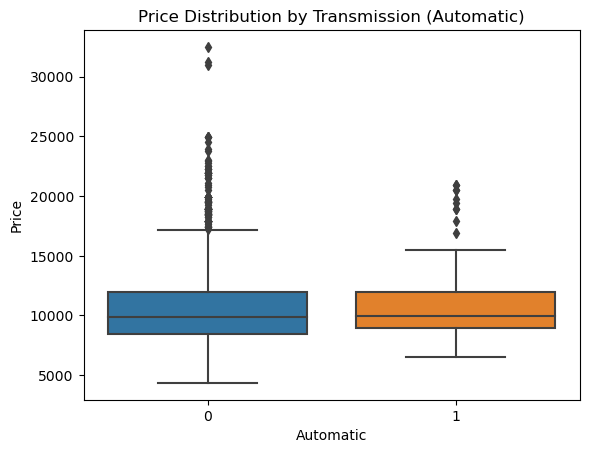

In [33]:
# Boxplot for Automatic
if 'Automatic' in df.columns:
    sns.boxplot(x='Automatic', y='Price', data=df)
    plt.title('Price Distribution by Transmission (Automatic)')
    plt.show()
else:
    print("Column 'Automatic' not found in DataFrame")

In [34]:
# Split into features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

In [35]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Model 1: Basic Multiple Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [37]:
# Evaluate Model 1
print("\nModel 1 - Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred1))
print("R^2 Score:", r2_score(y_test, y_pred1))
coef = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
print(coef)



Model 1 - Linear Regression
Mean Squared Error: 2203043.8231437034
R^2 Score: 0.8348888040611082
                   Coefficient
Age_08_04        -1.208305e+02
KM               -1.623141e-02
HP                1.403948e+01
Automatic         1.488309e+02
cc               -3.037219e-02
Doors            -6.031097e+01
Cylinders         3.694822e-13
Gears             5.516007e+02
Weight            2.588496e+01
Fuel_Type_Diesel -6.854876e+01
Fuel_Type_Petrol  1.370809e+03


In [38]:
# Model 2: Polynomial Features
poly = PolynomialFeatures(degree=2)
model2 = make_pipeline(poly, LinearRegression())
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [39]:
# Evaluate Model 2
print("\nModel 2 - Polynomial Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred2))
print("R^2 Score:", r2_score(y_test, y_pred2))


Model 2 - Polynomial Regression
Mean Squared Error: 3190493.174914451
R^2 Score: 0.7608825851710554


In [40]:
# Model 3: Interaction Terms
poly_interaction = PolynomialFeatures(degree=2, interaction_only=True)
X_train_interaction = poly_interaction.fit_transform(X_train)
X_test_interaction = poly_interaction.transform(X_test)
model3 = LinearRegression()
model3.fit(X_train_interaction, y_train)
y_pred3 = model3.predict(X_test_interaction)

In [41]:
# Evaluate Model 3
print("\nModel 3 - Interaction Terms")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred3))
print("R^2 Score:", r2_score(y_test, y_pred3))


Model 3 - Interaction Terms
Mean Squared Error: 2935157.213973471
R^2 Score: 0.7800192112491565


In [42]:
# Lasso Regression
lasso = Lasso(alpha=0.1)  # You can tune the alpha parameter
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


In [43]:
# Evaluate Lasso Regression
print("\nLasso Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("R^2 Score:", r2_score(y_test, y_pred_lasso))


Lasso Regression
Mean Squared Error: 2202270.260024681
R^2 Score: 0.8349467801805


In [44]:
# Ridge Regression
ridge = Ridge(alpha=0.1)  # You can tune the alpha parameter
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [45]:
# Evaluate Ridge Regression
print("\nRidge Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R^2 Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression
Mean Squared Error: 2202732.2441679
R^2 Score: 0.8349121559240098


In [ ]:
INTERVIEW QUESTIONS:
===================    
1. What is Normalization & Standardization and how is it helpful?
Normalization and Standardization are techniques used to prepare data for machine learning models, making sure the data is in a format that can be effectively used by the algorithm.

Normalization:

Concept: This technique adjusts the range of your data. It transforms feature values so they fall within a specific range, usually between 0 and 1.
Helpfulness:
This is useful when different features have different scales or units. For example, if one feature is in kilograms and another in meters, normalizing ensures they are on a similar scale.
It’s particularly important for models that rely on distances between data points, like k-nearest neighbors or neural networks, as it ensures that all features contribute equally.
Standardization:

Concept: This technique adjusts the data to have a mean of 0 and a standard deviation of 1. Essentially, it centers the data around zero and scales it based on its variability.
Helpfulness:
This is useful when features have different units or vary widely in range. Standardization makes sure that the data is centered and scaled consistently.
It’s especially important for algorithms that assume a normal distribution of data or that are sensitive to the scale of input features, such as linear regression or principal component analysis.

2. What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other. This can make the model unstable and the coefficients difficult to interpret. Here are some ways to handle it:

Remove Some Predictors:

Concept: If you find that certain predictors are highly correlated with each other, you might consider removing one of them. This simplifies the model and reduces redundancy.
Use Principal Component Analysis (PCA):

Concept: PCA is a technique that transforms your correlated predictors into a new set of variables that are uncorrelated. These new variables can be used in the regression model instead of the original ones.
Apply Regularization Techniques:

Concept: Regularization methods add constraints to the model to prevent overfitting and handle multicollinearity.
Ridge Regression: This method adds a penalty that shrinks the impact of less important predictors, helping to stabilize the model.
Lasso Regression: This method also adds a penalty but can reduce some predictors’ influence to zero, effectively performing variable selection.
Check Variance Inflation Factor (VIF):

Concept: VIF is a measure that indicates how much the variance of a predictor’s estimated coefficient is increased due to multicollinearity. High VIF values suggest problematic predictors. By examining VIF, you can identify and address these predictors.
Use Partial Least Squares Regression (PLS):

Concept: PLS is a technique that reduces the number of predictors by combining them into a smaller set of uncorrelated components, which can help manage multicollinearity.